# Day 8 作業

## [作業目標]
* 熟悉濾波器的操作

    1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
    2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

## [作業重點]
* 熟悉 OpenCV 的 filter2D 函數
* 觀察圖片的變化

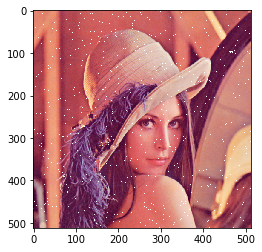

In [7]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

""" Your Code Here: 讀取 lena_noise.png 並使用 matplotlib 顯示 """
img_noise = cv2.imread('image/lena_noise.png')
plt.imshow(img_noise[:, :, [2, 1, 0]])

# 1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
* 因為 Average, Gaussian 都是使用 filter2D 去掃描圖片，故速度差不多
* NL 具較高的時間複雜度，需要較久的時間
* Median 具有最好的去白噪點效果，因為該演算法只會取範圍內的中位數，可以徹底去除極端值

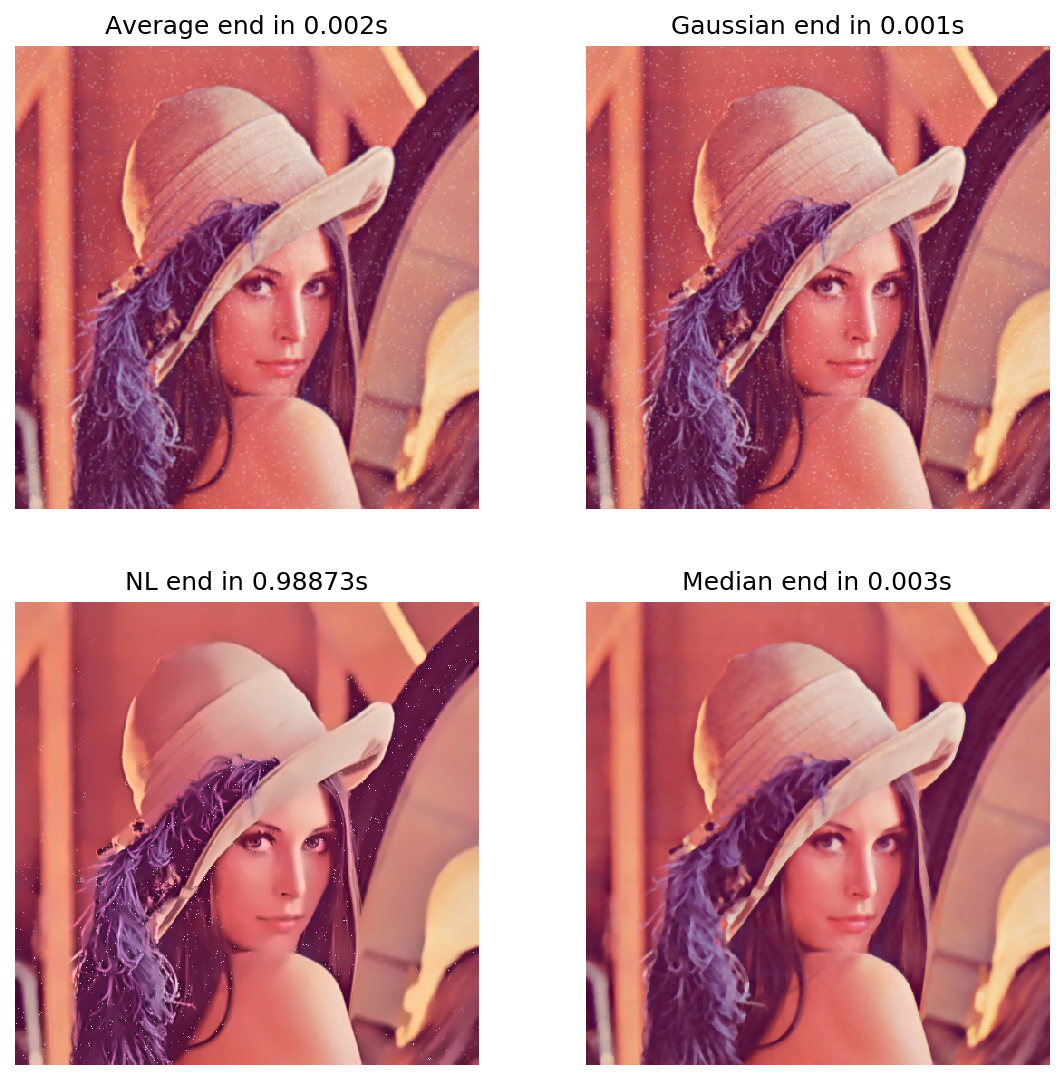

In [14]:
""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
# average blur

# make average filter
start1 = time.time()
average_filter = np.ones((3, 3)) / 9

# filtering
img_average = cv2.filter2D(img_noise, -1, average_filter)
end1 = time.time()
time_elapsed1= round(end1-start1, 5)

# gaussian blur
# make gaussian filter
start2 = time.time()
gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

img_gaussian = cv2.filter2D(img_noise, -1, gaussian_filter)
end2 = time.time()
time_elapsed2= round(end2-start2, 5)

#NL
start3 = time.time()
img_NL = cv2.fastNlMeansDenoisingColored(img_noise,None,10,10,7,21)
end3 = time.time()
time_elapsed3= round(end3-start3, 5)

#Median
start4 = time.time()
Median = cv2.medianBlur(img_noise, 5)
end4 = time.time()
time_elapsed4= round(end4-start4, 5)

plt.figure(figsize = (9, 9), dpi = 150)

show_img = [img_average, img_gaussian, img_NL, Median]
show_name = ['Average end in ', 'Gaussian end in ', 'NL end in ', 'Median end in ']
time_elapsed = [time_elapsed1, time_elapsed2, time_elapsed3, time_elapsed4]
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1, title = show_name[i] + str(time_elapsed[i])+'s')
    plt.imshow(show_img[i][:, :, [2, 1, 0]])
    plt.axis('off')

# 2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

In [21]:
def sobel(gray):
    """ Your Code Here: 實作 Sobel 演算法 """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    start1 = time.time()
    # Get x edge
    sobel_x = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])

    Gx = cv2.filter2D(gray, -1, sobel_x)
    end1 = time.time()
    time_elapsed1= round(end1-start1, 5)

    # Get y edge
    start2 = time.time()
    sobel_y = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])

    Gy = cv2.filter2D(gray, -1, sobel_y)
    end2 = time.time()
    time_elapsed2= round(end2-start2, 5)
    
    start3 = time.time()
    Gx = cv2.convertScaleAbs(Gx)
    Gy = cv2.convertScaleAbs(Gy)

    
    edge = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)
    end3 = time.time()
    time_elapsed3= round(end3-start3, 5)+time_elapsed1+time_elapsed2
    
    return Gx, Gy, edge,  time_elapsed1, time_elapsed2, time_elapsed3

def canny(gray):
    """ Your Code Here: 實作 Canny 演算法 """
    start4 = time.time()
    gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
    ]) / 16

    gray_gaussian = cv2.filter2D(gray, -1, gaussian_filter)
    edge_canny = cv2.Canny(gray_gaussian, 50, 150)
    end4 = time.time()
    time_elapsed4= round(end4-start4, 5)
    return edge, time_elapsed4

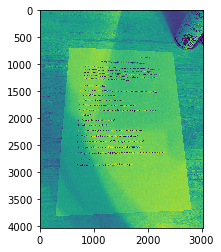

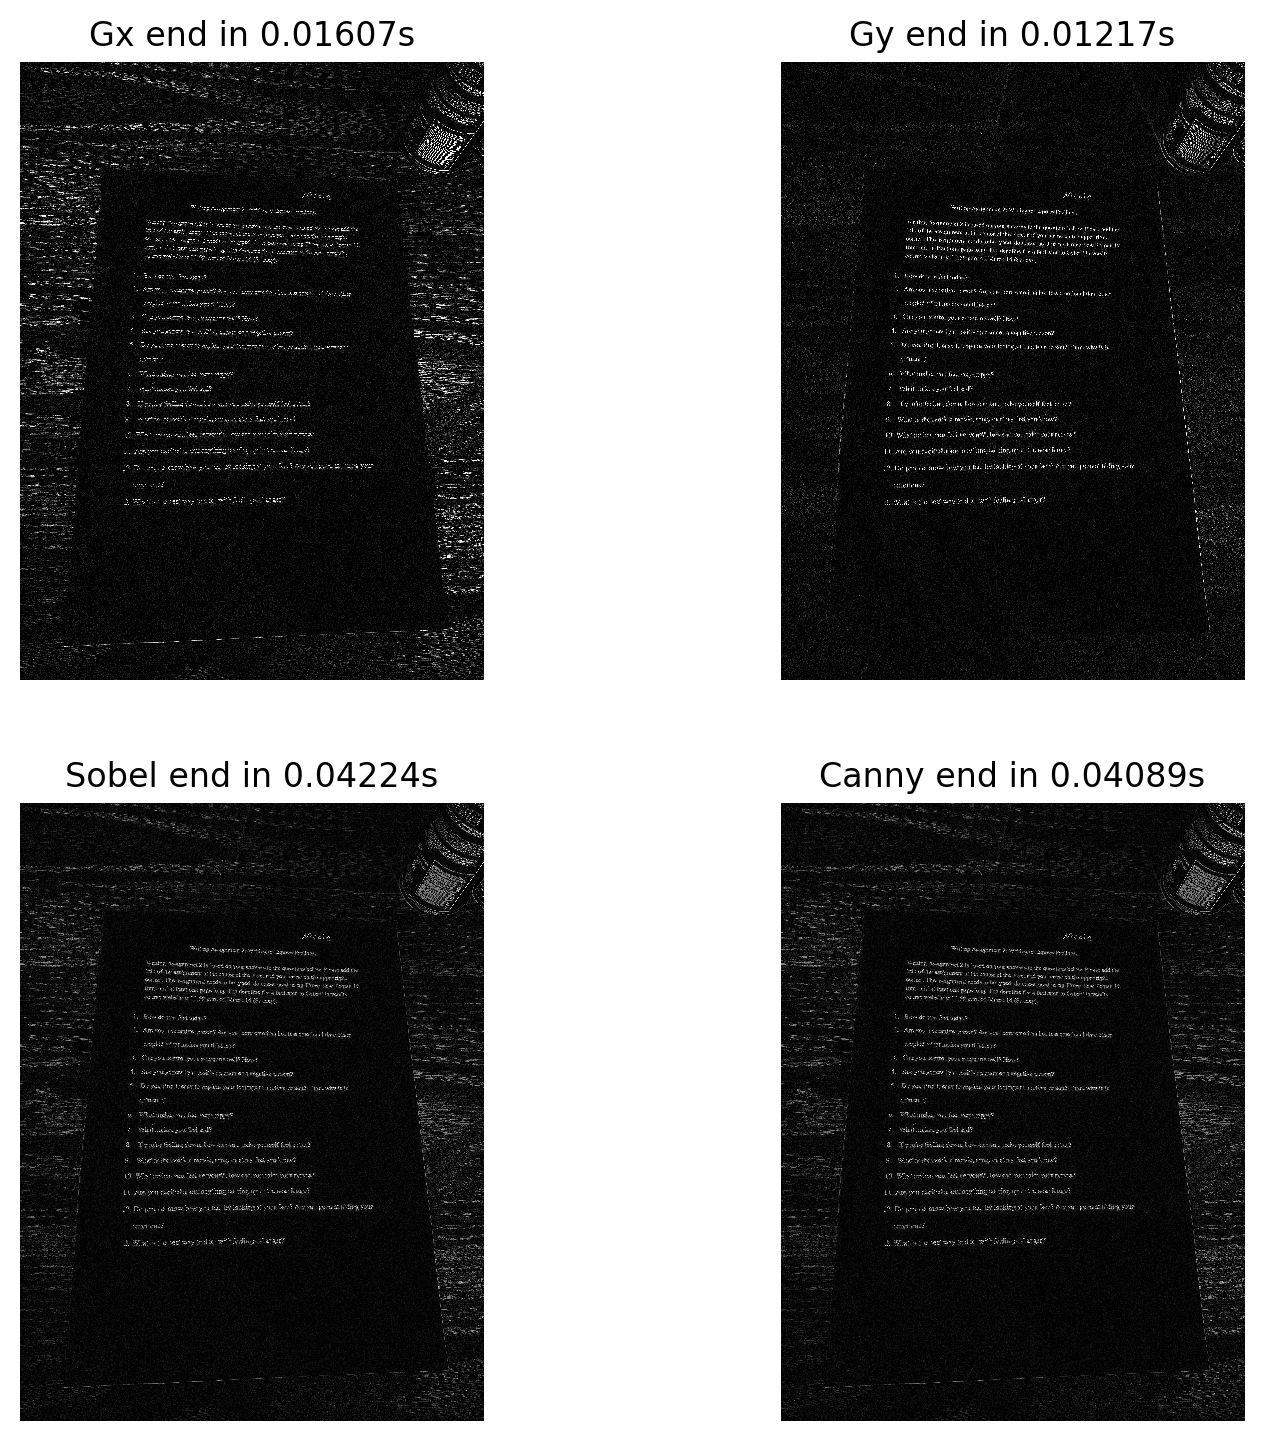

In [24]:
""" Your Code Here: 讀取 ./data/paper.jpg 進行實作 """
img = cv2.imread('image/paper.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
Gx, Gy, edge,  time_elapsed1, time_elapsed2, time_elapsed3 = sobel(gray)
edge_canny, time_elapsed4 = canny(gray)

plt.figure(figsize = (9, 9), dpi = 200)
show_img = [Gx, Gy, edge, edge_canny]
show_name = ['Gx end in ', 'Gy end in ', 'Sobel end in ', 'Canny end in ']
time_elapsed = [time_elapsed1, time_elapsed2, time_elapsed3, time_elapsed4]
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1, title = show_name[i]+ str(time_elapsed[i])+'s')
    plt.imshow(show_img[i], cmap = 'gray')
    plt.axis('off')